In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Define directories
df_dir = '/content/drive/My Drive/Maternal_Health_Risk/Maternal_Health_Risk_Data_Set.csv'

# Load your maternal health dataset
df = pd.read_csv(df_dir)
print(df.head())
print(df.info())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle


In [ ]:
# Assuming your target column is named 'RiskLevel'

X = df.drop('RiskLevel', axis=1)  # Features
y = df['RiskLevel']  # Target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Random Forest Classifier**

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.86      0.75      0.80        80
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203

Confusion Matrix:
 [[40  1  6]
 [ 3 60 17]
 [ 3  9 64]]


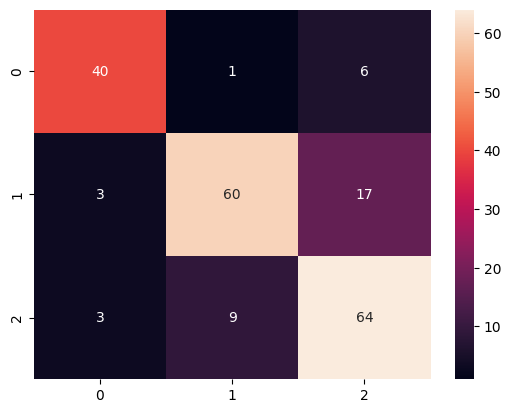

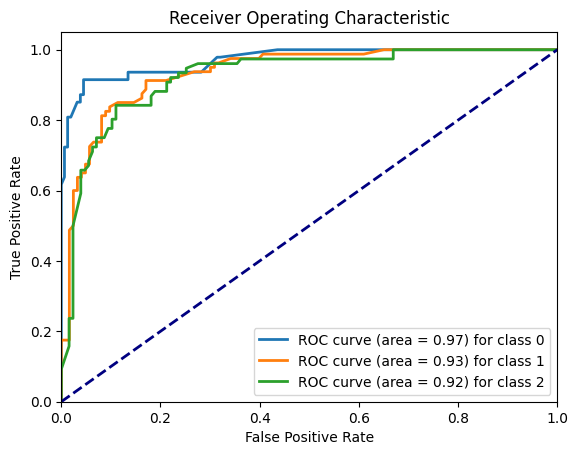

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Apply a classification algorithm (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=model.classes_)
y_prob = model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], model.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Extra Trees Classifier**

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        47
           1       0.84      0.81      0.83        80
           2       0.78      0.82      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.82      0.82      0.82       203

Confusion Matrix:
 [[40  1  6]
 [ 4 65 11]
 [ 3 11 62]]


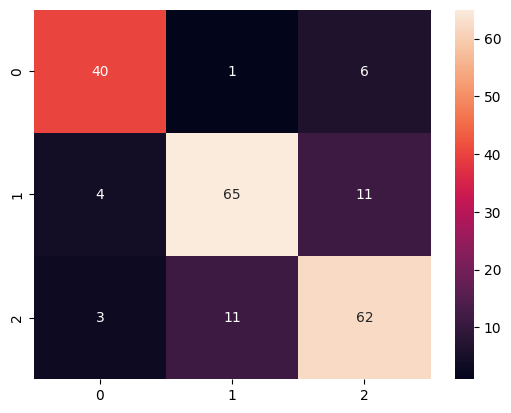

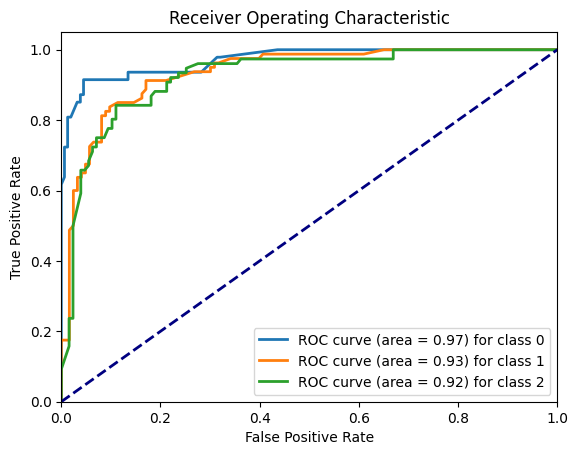

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import ExtraTreesClassifier

# Apply a classification algorithm (Random Forest in this case)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state= 0)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()



y_test_bin = label_binarize(y_test, classes=clf.classes_)
y_prob = model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], clf.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**XGBClassifier**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:48:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.87      0.82      0.85        80
           2       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
 [[41  1  5]
 [ 4 66 10]
 [ 3  9 64]]


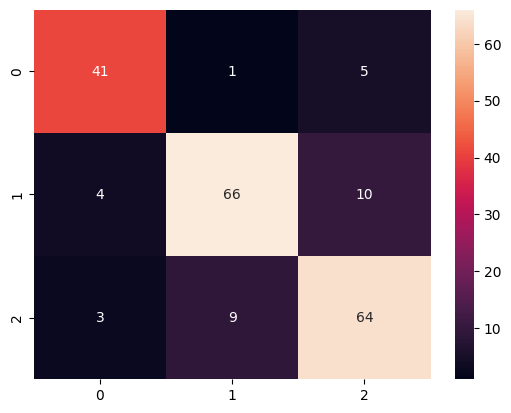

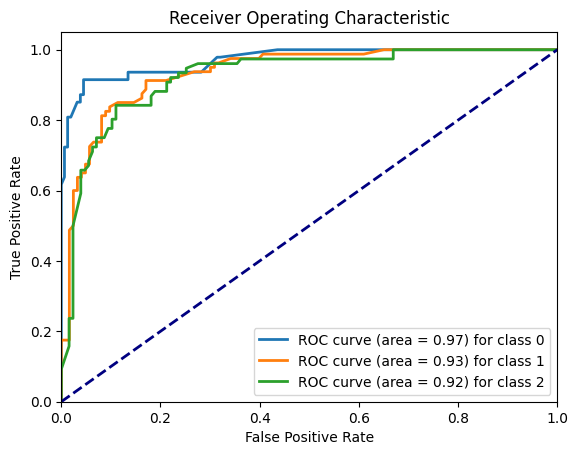

In [ ]:
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=xgb.classes_)
y_prob = model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], xgb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:31:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Optimal number of features: 6
Ranking of features: [1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.87      0.82      0.85        80
           2       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
 [[41  1  5]
 [ 4 66 10]
 [ 3  9 64]]


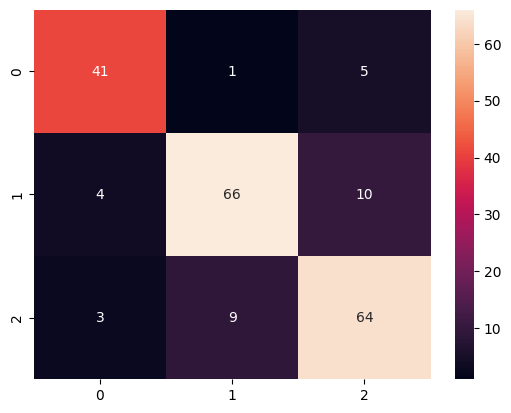

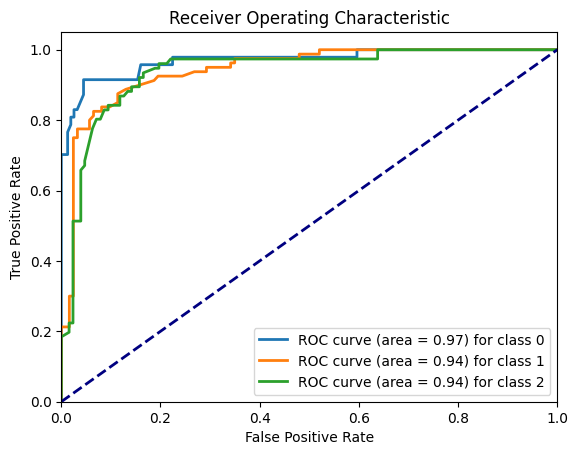

In [ ]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Apply RFECV to select important features
rfecv = RFECV(estimator=xgb, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:40:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        47
           1       0.83      0.86      0.85        80
           2       0.81      0.79      0.80        76

    accuracy                           0.84       203
   macro avg       0.84      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
 [[41  1  5]
 [ 2 69  9]
 [ 3 13 60]]


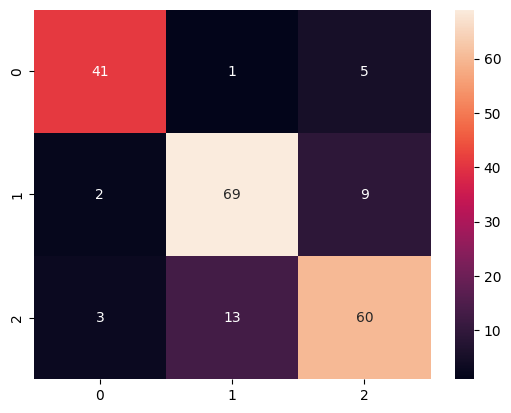

NameError: name 'rf' is not defined

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(xgb, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train_scaled, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train_scaled)
X_test_ffs = ffs.transform(X_test_scaled)

# Train the Random Forest classifier on the selected features
xgb.fit(X_train_ffs, y_train)
y_pred = xgb.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=xgb.classes_)
y_prob = xgb.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], xgb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Step 2: Remove outliers using Z-Score Method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Step 3: Split features and labels
X = df_no_outliers.drop(columns=['RiskLevel'])  # Replace 'target' with the actual label column name
y = df_no_outliers['RiskLevel']


le = LabelEncoder()
y = le.fit_transform(y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Set up XGBoost and Grid Search
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Step 7: Fit the model
grid_search.fit(X_train, y_train)

# Step 8: Best parameters and model evaluation
best_xgb = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Training Accuracy: ", best_xgb.score(X_train, y_train))
print("Test Accuracy: ", best_xgb.score(X_test, y_test))

# Step 9: Make predictions and evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_xgb.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Training Accuracy:  0.9231754161331626
Test Accuracy:  0.8673469387755102
Confusion Matrix:
 [[40  2  5]
 [ 0 72 13]
 [ 3  3 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        47
           1       0.94      0.85      0.89        85
           2       0.76      0.91      0.83        64

    accuracy                           0.87       196
   macro avg       0.88      0.87      0.87       196
weighted avg       0.88      0.87      0.87       196



ValueError: multi_class must be in ('ovo', 'ovr')

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Step 2: Remove outliers using Z-Score Method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Step 3: Split features and labels
X = df_no_outliers.drop(columns=['RiskLevel'])  # Replace 'target' with the actual label column name
y = df_no_outliers['RiskLevel']


le = LabelEncoder()
y = le.fit_transform(y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Set up XGBoost and Grid Search
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Apply RFECV to select important features
rfecv = RFECV(estimator=grid_search, step=1, cv=5, scoring='accuracy')

# Step 7: Fit the model
rfecv.fit(X_train, y_train)

# Step 8: Best parameters and model evaluation
best_xgb = rfecv.best_estimator_
print("Best parameters found: ", best_xgb.best_params_)
print("Training Accuracy: ", best_xgb.score(X_train, y_train))
print("Test Accuracy: ", best_xgb.score(X_test, y_test))

# Step 9: Make predictions and evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_xgb.predict(X_test)

# Selected features
print(f"Optimal number of features: {best_xgb.n_features_}")
print(f"Ranking of features: {best_xgb.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=best_xgb.classes_)
y_prob = best_xgb.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], best_xgb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


ValueError: when `importance_getter=='auto'`, the underlying estimator GridSearchCV should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

**MLPClassifier**

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.60      0.85      0.70        80
           2       0.68      0.34      0.46        76

    accuracy                           0.66       203
   macro avg       0.69      0.68      0.66       203
weighted avg       0.67      0.66      0.64       203

Confusion Matrix:
 [[40  3  4]
 [ 4 68  8]
 [ 7 43 26]]


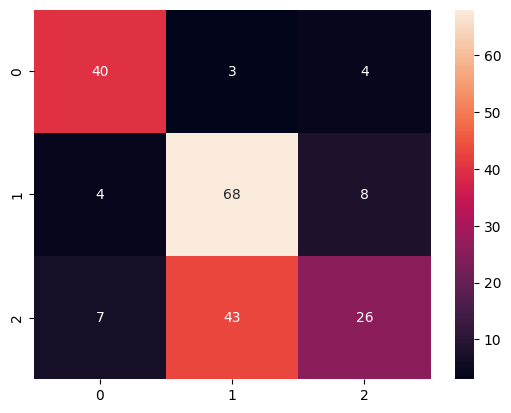

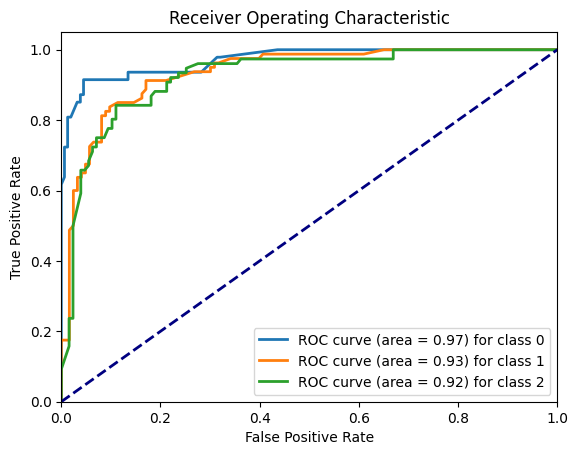

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier

# Initialize the ANN (MLPClassifier)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

ann.fit(X_train_scaled, y_train)
y_pred = ann.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()



y_test_bin = label_binarize(y_test, classes=ann.classes_)
y_prob = model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], ann.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score # import accuracy_score

# Initialize the ANN (MLPClassifier)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Apply RFECV to select important features
rfecv = RFECV(estimator=ann, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()



y_test_bin = label_binarize(y_test, classes=ann.classes_)

# Use the fitted rfecv model to predict probabilities
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], ann.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Assuming your target column is named 'RiskLevel'

X = df.drop('RiskLevel', axis=1)  # Features
y = df['RiskLevel']  # Target

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**RandomForestClassifier**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.83      0.91      0.87        76
    low risk       0.83      0.74      0.78       117
    mid risk       0.74      0.78      0.76       112

    accuracy                           0.80       305
   macro avg       0.80      0.81      0.80       305
weighted avg       0.80      0.80      0.80       305

Confusion Matrix:
 [[69  2  5]
 [ 5 87 25]
 [ 9 16 87]]


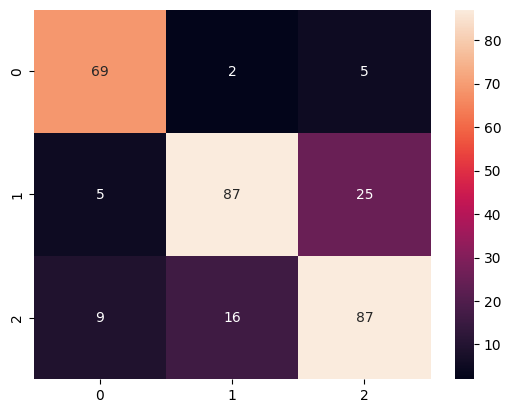

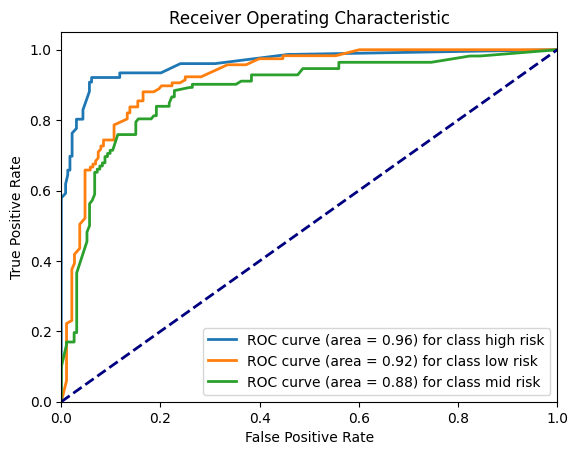

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Apply a classification algorithm (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()



y_test_bin = label_binarize(y_test, classes=model.classes_)
y_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], model.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.83      0.82      0.82        76
    low risk       0.83      0.75      0.79       117
    mid risk       0.71      0.79      0.75       112

    accuracy                           0.78       305
   macro avg       0.79      0.78      0.79       305
weighted avg       0.79      0.78      0.78       305

Confusion Matrix:
 [[62  3 11]
 [ 4 88 25]
 [ 9 15 88]]


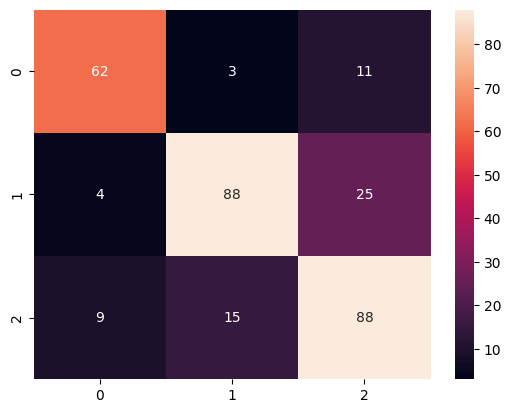

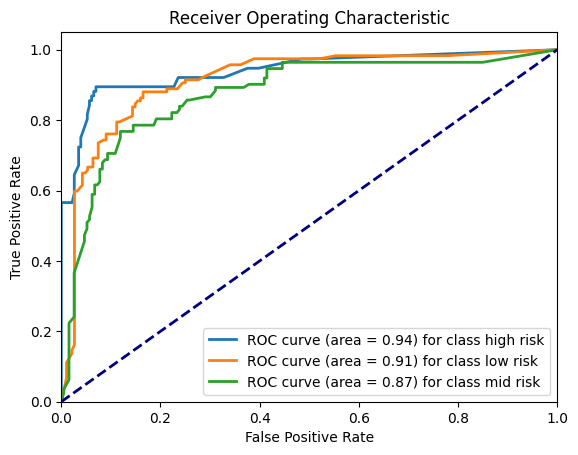

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Apply a classification algorithm (Random Forest in this case)
rf = RandomForestClassifier(random_state=50)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(rf, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Random Forest classifier on the selected features
rf.fit(X_train_ffs, y_train)
y_pred = rf.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rf.classes_)
y_prob = rf.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rf.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Optimal number of features: 6
Ranking of features: [1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.83      0.91      0.87        76
    low risk       0.83      0.74      0.78       117
    mid risk       0.74      0.78      0.76       112

    accuracy                           0.80       305
   macro avg       0.80      0.81      0.80       305
weighted avg       0.80      0.80      0.80       305

Confusion Matrix:
 [[69  2  5]
 [ 5 87 25]
 [ 9 16 87]]


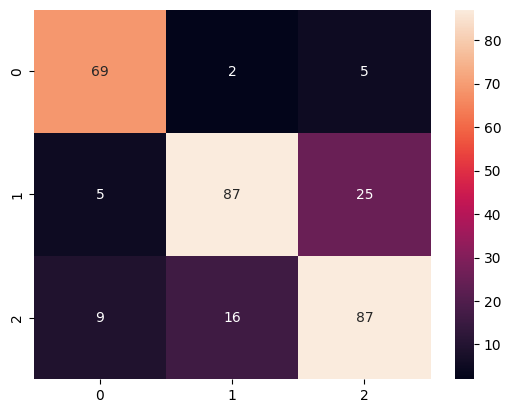

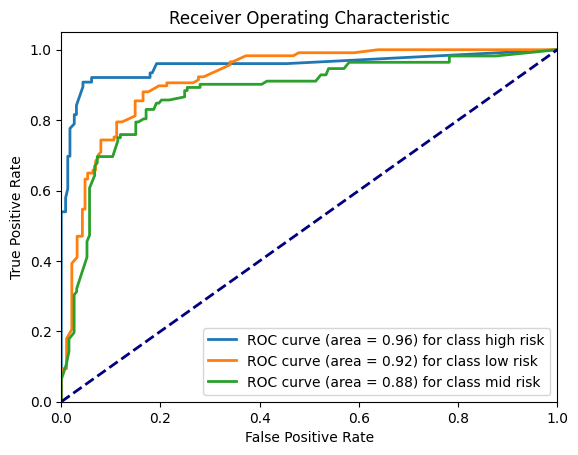

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix


# Define the model
model = RandomForestClassifier()

# Apply RFECV to select important features
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

y_pred = rfecv.predict(X_test)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Decision Tree Classifier**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.84      0.91      0.87        76
    low risk       0.84      0.75      0.79       117
    mid risk       0.74      0.78      0.76       112

    accuracy                           0.80       305
   macro avg       0.81      0.81      0.81       305
weighted avg       0.80      0.80      0.80       305

Confusion Matrix:
 [[69  1  6]
 [ 4 88 25]
 [ 9 16 87]]


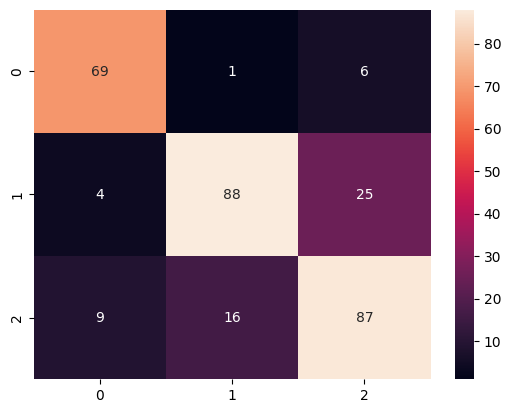

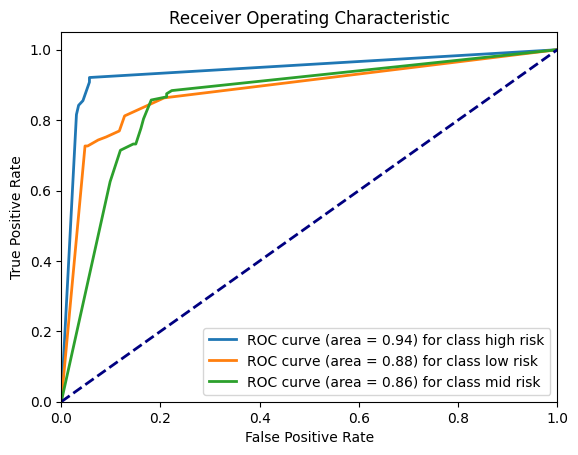

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=dt.classes_)
y_prob = dt.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], dt.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.86      0.87      0.86        76
    low risk       0.80      0.83      0.82       117
    mid risk       0.79      0.76      0.78       112

    accuracy                           0.81       305
   macro avg       0.82      0.82      0.82       305
weighted avg       0.81      0.81      0.81       305

Confusion Matrix:
 [[66  3  7]
 [ 5 97 15]
 [ 6 21 85]]


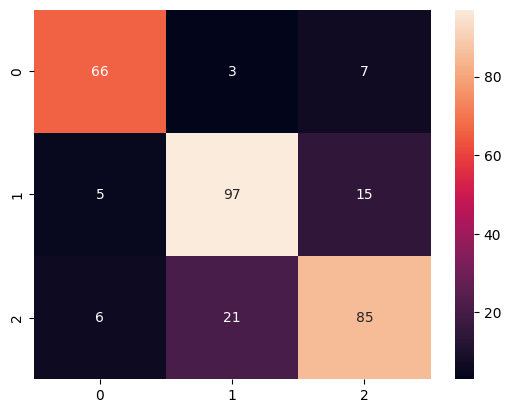

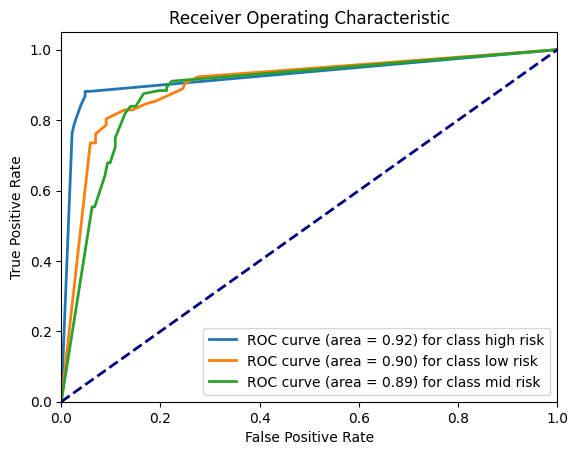

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(dt, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Decision Tree classifier on the selected features
dt.fit(X_train_ffs, y_train)
y_pred = dt.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=dt.classes_)
y_prob = dt.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], dt.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Optimal number of features: 4
Ranking of features: [1 1 2 1 3 1]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.81      0.88      0.84        76
    low risk       0.83      0.74      0.78       117
    mid risk       0.74      0.78      0.76       112

    accuracy                           0.79       305
   macro avg       0.79      0.80      0.80       305
weighted avg       0.79      0.79      0.79       305

Confusion Matrix:
 [[67  2  7]
 [ 7 87 23]
 [ 9 16 87]]


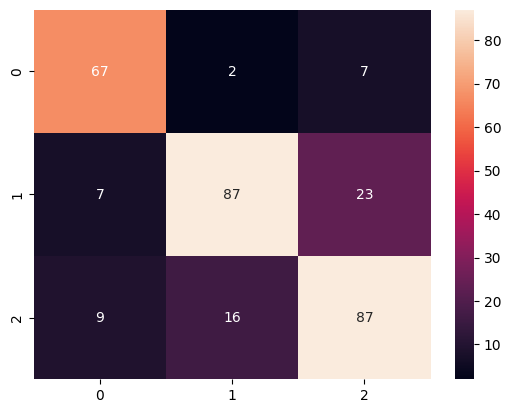

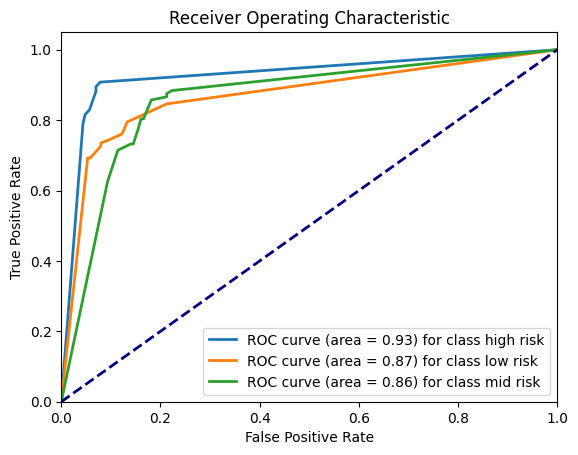

In [ ]:

from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Apply RFECV to select important features
rfecv = RFECV(estimator=dt, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

y_pred = rfecv.predict(X_test)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.72      0.76      0.74        76
    low risk       0.58      0.92      0.72       117
    mid risk       0.60      0.21      0.32       112

    accuracy                           0.62       305
   macro avg       0.64      0.63      0.59       305
weighted avg       0.62      0.62      0.58       305

Confusion Matrix:
 [[ 58   7  11]
 [  4 108   5]
 [ 18  70  24]]


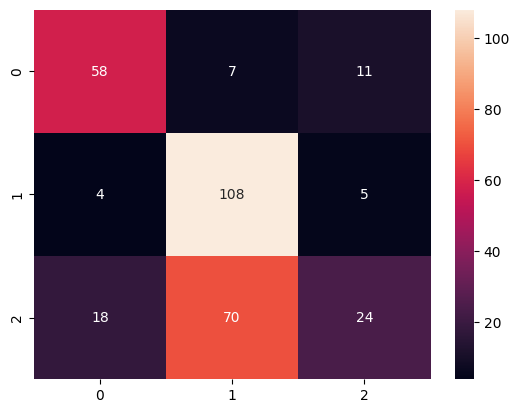

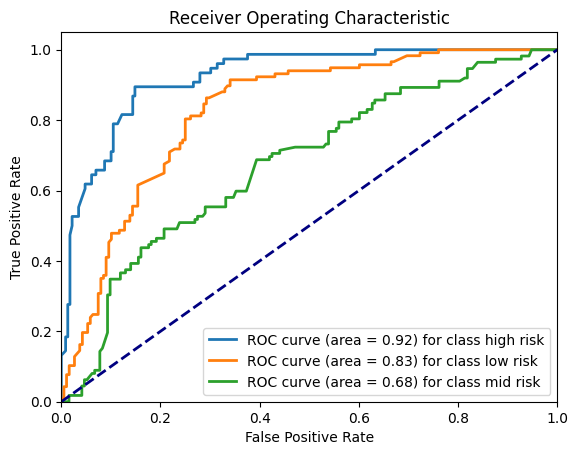

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the Decision Tree classifier
# Initialize SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=svm.classes_)
y_prob = svm.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], svm.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.80      0.80      0.80        76
    low risk       0.58      0.92      0.71       117
    mid risk       0.55      0.21      0.30       112

    accuracy                           0.63       305
   macro avg       0.64      0.64      0.60       305
weighted avg       0.62      0.63      0.58       305

Confusion Matrix:
 [[ 61   3  12]
 [  2 108   7]
 [ 13  76  23]]


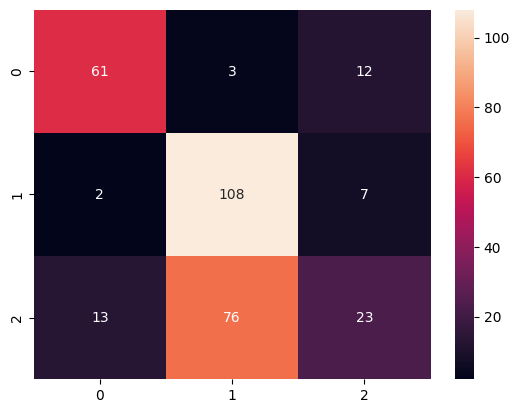

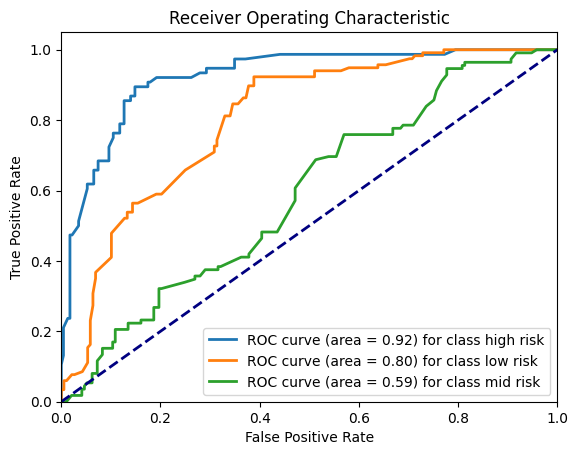

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize SVM model
svm = SVC(kernel='linear', probability=True)


# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(svm, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Decision Tree classifier on the selected features
svm.fit(X_train_ffs, y_train)
y_pred = svm.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=svm.classes_)
y_prob = svm.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], svm.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Initialize SVM model
svm = SVC(kernel='linear', probability=True)

# Apply RFECV to select important features
rfecv = RFECV(estimator=svm, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

y_pred = rfecv.predict(X_test)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'X_train' is not defined

**Logistic Regression**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.70      0.78      0.74        76
    low risk       0.61      0.89      0.72       117
    mid risk       0.62      0.28      0.38       112

    accuracy                           0.64       305
   macro avg       0.64      0.65      0.61       305
weighted avg       0.64      0.64      0.60       305

Confusion Matrix:
 [[ 59   6  11]
 [  5 104   8]
 [ 20  61  31]]


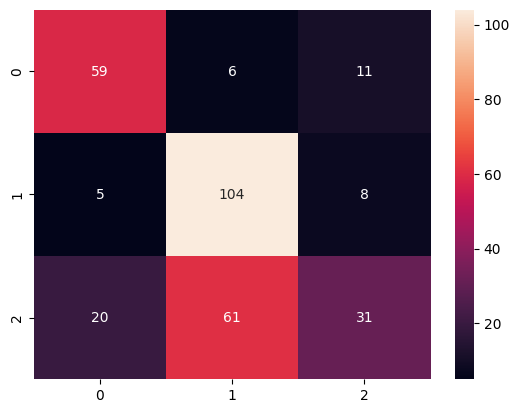

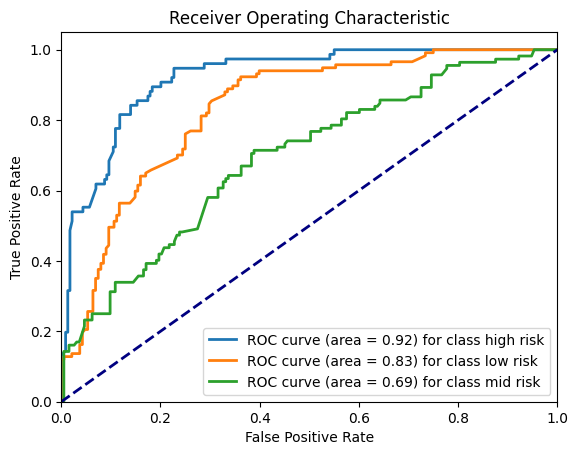

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=20, max_iter=1000)
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=lr.classes_)
y_prob = lr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], lr.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.77      0.63      0.70        76
    low risk       0.59      0.91      0.72       117
    mid risk       0.48      0.26      0.34       112

    accuracy                           0.60       305
   macro avg       0.61      0.60      0.58       305
weighted avg       0.59      0.60      0.57       305

Confusion Matrix:
 [[ 48   4  24]
 [  2 107   8]
 [ 12  71  29]]


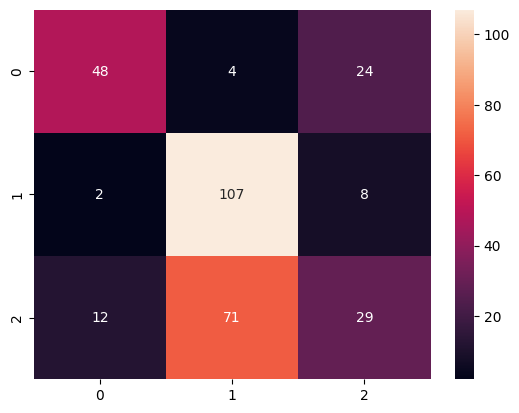

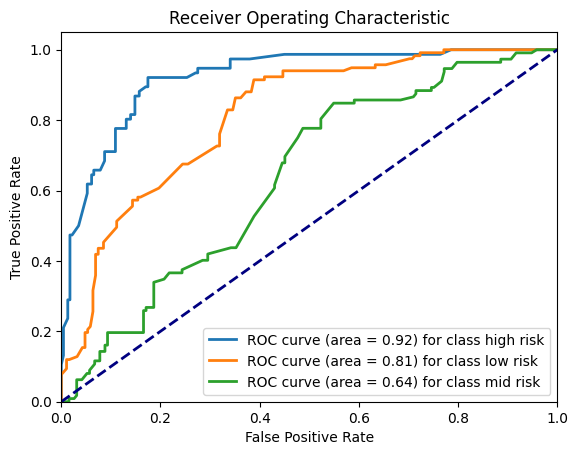

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=20, max_iter=1000)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Logistic Regression classifier on the selected features
lr.fit(X_train_ffs, y_train)
y_pred = lr.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=lr.classes_)
y_prob = lr.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], lr.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal number of features: 5
Ranking of features: [2 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.70      0.78      0.74        76
    low risk       0.61      0.89      0.72       117
    mid risk       0.62      0.28      0.38       112

    accuracy                           0.64       305
   macro avg       0.64      0.65      0.61       305
weighted avg       0.64      0.64      0.60       305

Confusion Matrix:
 [[ 59   6  11]
 [  5 104   8]
 [ 20  61  31]]


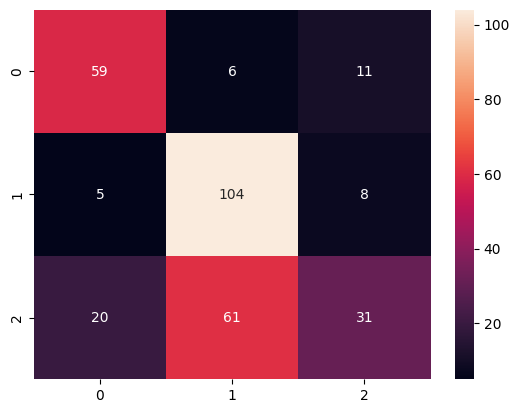

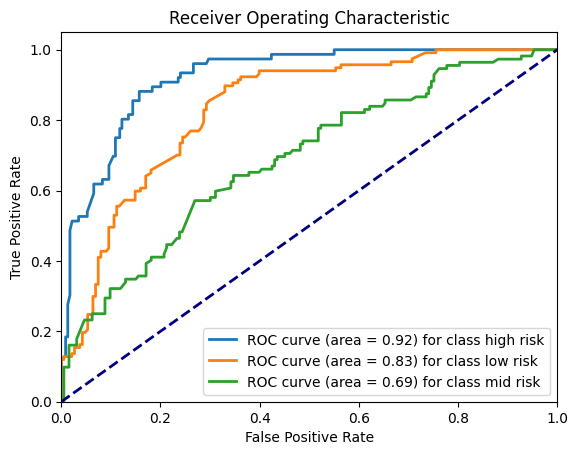

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=20, max_iter=1000)

# Apply RFECV to select important features
rfecv = RFECV(estimator=lr, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

y_pred = rfecv.predict(X_test)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**KNeighbors Classifier**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.73      0.74      0.73        76
    low risk       0.57      0.74      0.64       117
    mid risk       0.57      0.39      0.47       112

    accuracy                           0.61       305
   macro avg       0.62      0.62      0.61       305
weighted avg       0.61      0.61      0.60       305

Confusion Matrix:
 [[56  9 11]
 [ 9 86 22]
 [12 56 44]]


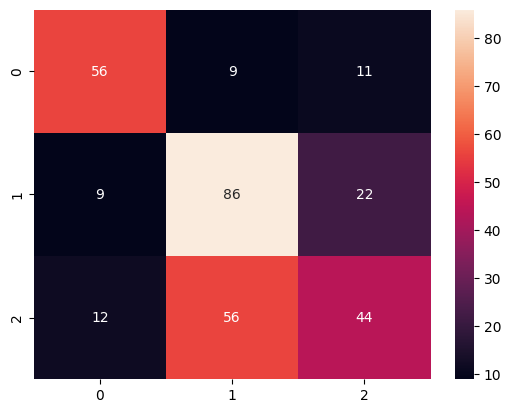

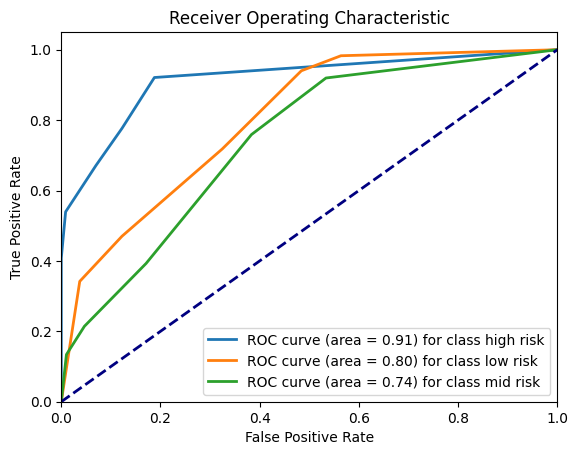

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=knn.classes_)
y_prob = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], knn.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.77      0.76      0.77        76
    low risk       0.61      0.72      0.66       117
    mid risk       0.59      0.49      0.54       112

    accuracy                           0.65       305
   macro avg       0.66      0.66      0.66       305
weighted avg       0.65      0.65      0.64       305

Confusion Matrix:
 [[58  9  9]
 [ 4 84 29]
 [13 44 55]]


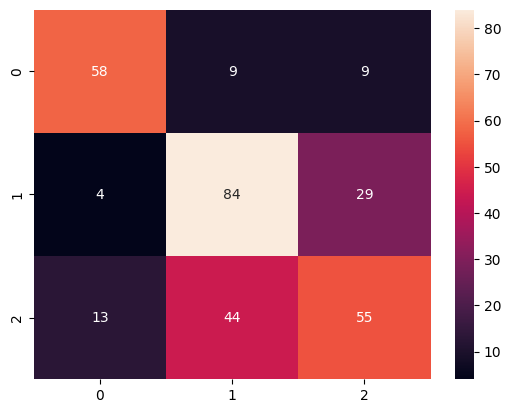

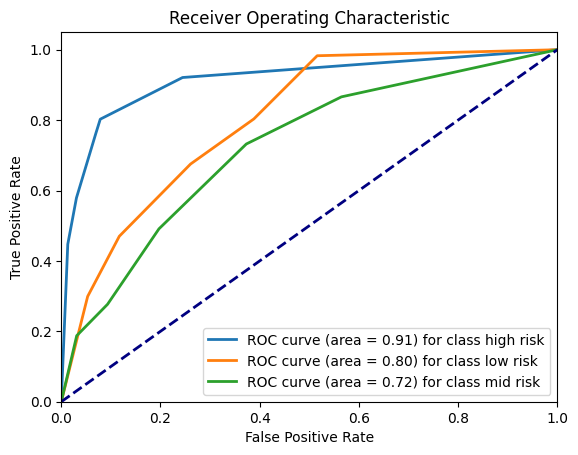

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the K-Nearest Neighbors classifier on the selected features
knn.fit(X_train_ffs, y_train)
y_pred = knn.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=knn.classes_)
y_prob = knn.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], knn.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Apply RFECV to select important features
rfecv = RFECV(estimator=knn, step=1, cv=5, scoring='accuracy',importance_getter='permutation')
rfecv.fit(X_train, y_train)

y_pred = rfecv.predict(X_test)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'permutation'


**GaussianNB**


Classification Report:
               precision    recall  f1-score   support

   high risk       0.78      0.61      0.68        76
    low risk       0.51      0.93      0.66       117
    mid risk       0.52      0.15      0.23       112

    accuracy                           0.56       305
   macro avg       0.60      0.56      0.53       305
weighted avg       0.58      0.56      0.51       305

Confusion Matrix:
 [[ 46  19  11]
 [  3 109   5]
 [ 10  85  17]]


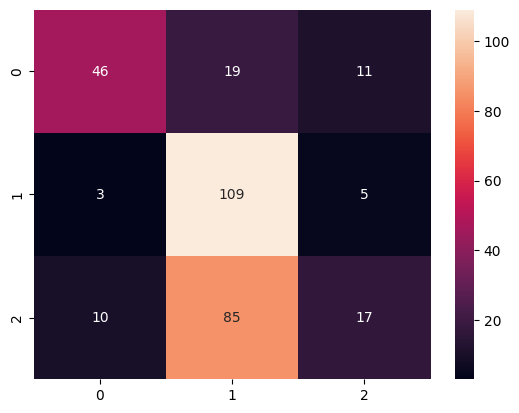

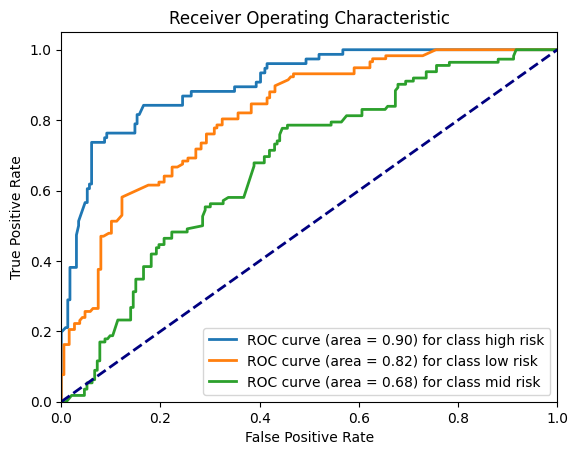

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=nb.classes_)
y_prob = nb.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], nb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.78      0.62      0.69        76
    low risk       0.51      0.92      0.65       117
    mid risk       0.47      0.13      0.21       112

    accuracy                           0.56       305
   macro avg       0.59      0.56      0.52       305
weighted avg       0.56      0.56      0.50       305

Confusion Matrix:
 [[ 47  18  11]
 [  3 108   6]
 [ 10  87  15]]


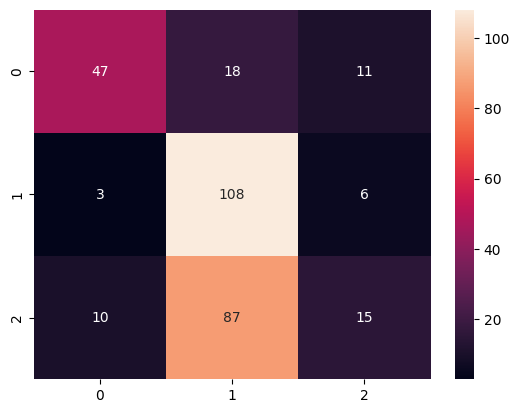

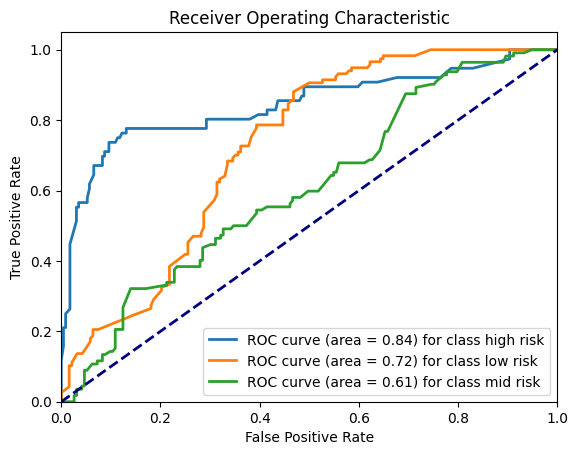

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(nb, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Naive Bayes classifier on the selected features
nb.fit(X_train_ffs, y_train)
y_pred = nb.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=nb.classes_)
y_prob = nb.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], nb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.80      0.70      0.75        76
    low risk       0.54      0.94      0.68       117
    mid risk       0.56      0.17      0.26       112

    accuracy                           0.60       305
   macro avg       0.63      0.60      0.56       305
weighted avg       0.61      0.60      0.54       305

Confusion Matrix:
 [[ 53  12  11]
 [  3 110   4]
 [ 10  83  19]]


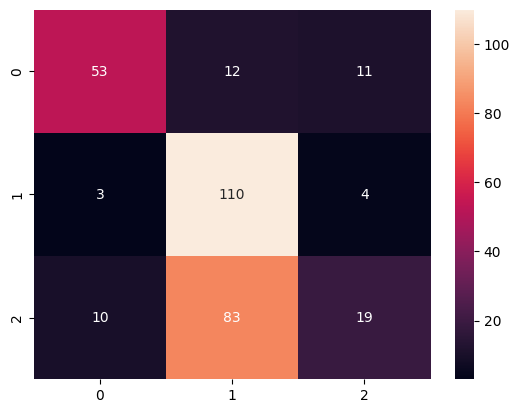

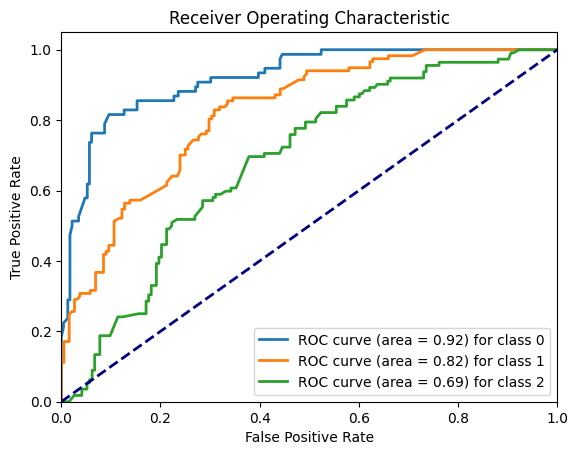

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Used for feature selection
from sklearn.preprocessing import label_binarize

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Use a model with `coef_` or `feature_importances_` for RFE
lr = LogisticRegression(max_iter=1000)  # Logistic Regression for RFE

# Perform RFE with Logistic Regression to select features
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)  # Adjust n_features_to_select
rfe.fit(X_train, y_train)

# Transform training and testing sets based on selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Now fit GaussianNB on the reduced feature set
nb.fit(X_train_rfe, y_train)
y_pred = nb.predict(X_test_rfe)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix and plot heatmap
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# For ROC curve
y_prob = nb.predict_proba(X_test_rfe)

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**GridSearchCV + RandomForestClassifier**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

   high risk       0.84      0.91      0.87        76
    low risk       0.85      0.79      0.82       117
    mid risk       0.77      0.78      0.77       112

    accuracy                           0.82       305
   macro avg       0.82      0.83      0.82       305
weighted avg       0.82      0.82      0.82       305

Confusion Matrix:
 [[69  1  6]
 [ 4 93 20]
 [ 9 16 87]]


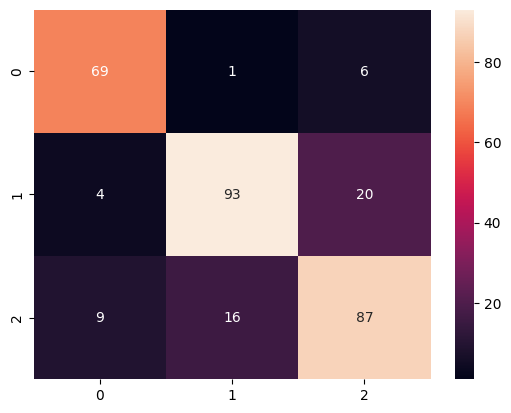

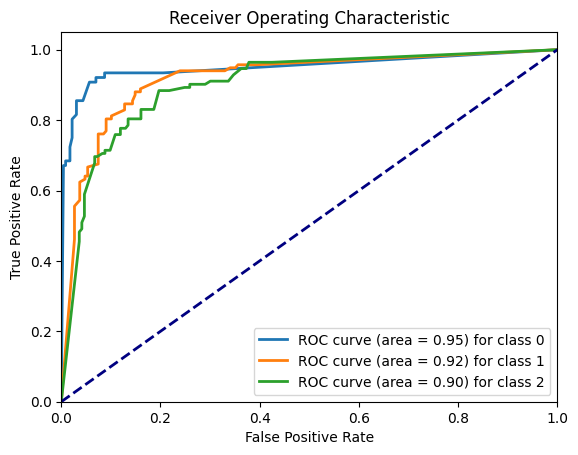

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples to be a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# For ROC curve
y_prob = best_rf.predict_proba(X_test)

# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.0 MB/s eta 0:00:00


In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(rf)

# Compute SHAP values, ensure you use the same data you will plot!
shap_values = explainer.shap_values(X_test) # Use X_test here

# For binary classification, use shap_values[1] for the positive class
# For multi-class classification, handle each class separately
if len(shap_values) == 2:  # Binary classification
    # Summary plot
    shap.summary_plot(shap_values[1], X_test) # And X_test here

    # Force plot for the first instance
    shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test.iloc[0, :], matplotlib=True)
if len(shap_values) > 2:  # Multi-class classification
    for i in range(len(shap_values)):
        print(f"Plotting SHAP values for class {i}")
        shap.summary_plot(shap_values[i], X_test, title=f"Class {i}")

        # Force plot for the first instance for each class
        shap.force_plot(explainer.expected_value[i], shap_values[i][0, :], X_test.iloc[0, :], matplotlib=True)

Plotting SHAP values for class 0


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b607b9ede561316a70ee8555e477676b6931541373ebc539ac509242b1cfe839
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

[('SystolicBP > 120.00', -0.37623651412025677), ('BodyTemp <= 98.00', 0.20429877661488383), ('7.50 < BS <= 8.00', 0.11099430092183409), ('27.00 < Age <= 39.00', -0.05007120553611119), ('76.00 < HeartRate <= 80.00', -0.03568312681681469), ('65.00 < DiastolicBP <= 80.00', -0.004650451974149502)]


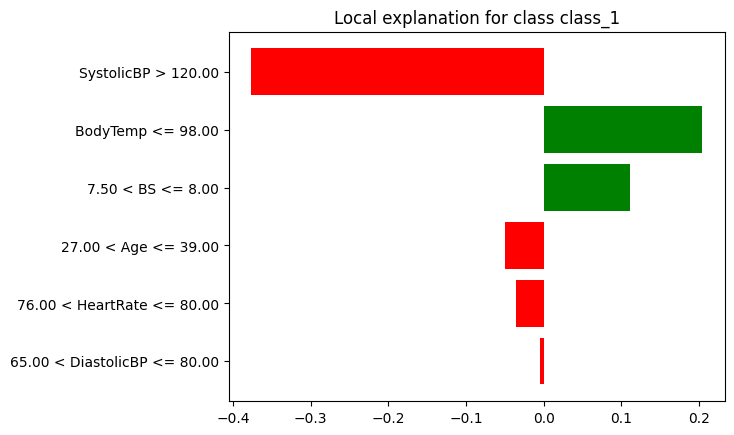

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Initialize LIME Tabular Explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['class_0', 'class_1'],  # Update with your class names
    mode='classification'
)

# Explain a prediction (for instance, the first instance in the test set)
idx = 0  # Index of the instance to explain
exp = explainer.explain_instance(
    X_test.iloc[idx],
    rf.predict_proba,
    num_features=10  # Number of features to show in the explanation
)

# Print and visualize the explanation
print(exp.as_list())  # List of feature importances and their contributions

# Plot the explanation
exp.as_pyplot_figure()
plt.show()


In [ ]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.5 MB/s eta 0:00:00


**Data Augmentation using SMOTE (Synthetic Minority Over-sampling Technique)**

In [ ]:
# Assuming the target column is named 'Risk'
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Apply SMOTE to generate 60,000 samples
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combining resampled data into a DataFrame
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='RiskLevel')

# Shuffle the dataset
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled = shuffle(df_resampled, random_state=42)

# Verify the new dataset size
print(df_resampled.shape)


(1218, 7)


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your target column is named 'RiskLevel'
X = df.drop('RiskLevel', axis=1)  # Features
y = df['RiskLevel']  # Target

# Define SMOTE with a strategy to increase the dataset size
target_samples = 60000
sampling_strategy = {label: int((target_samples / len(y)) * sum(y == label)) for label in y.unique()}

# Initialize SMOTE with the new sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='RiskLevel')], axis=1)

# Shuffle the new dataset
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the size of the new dataset
print(f'Original dataset size: {df.shape}')
print(f'Resampled dataset size: {df_resampled.shape}')


Original dataset size: (1014, 7)
Resampled dataset size: (59998, 7)


In [ ]:
# Save the new dataset to a CSV file
df_resampled.to_csv('/content/drive/My Drive/Maternal_Health_Risk/Maternal_health_risk_resampled.csv', index=False)


NameError: name 'df_resampled' is not defined

In [ ]:
X_resampled = df_resampled.drop('RiskLevel', axis=1)
y_resampled = df_resampled['RiskLevel']

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


NameError: name 'RandomForestClassifier' is not defined

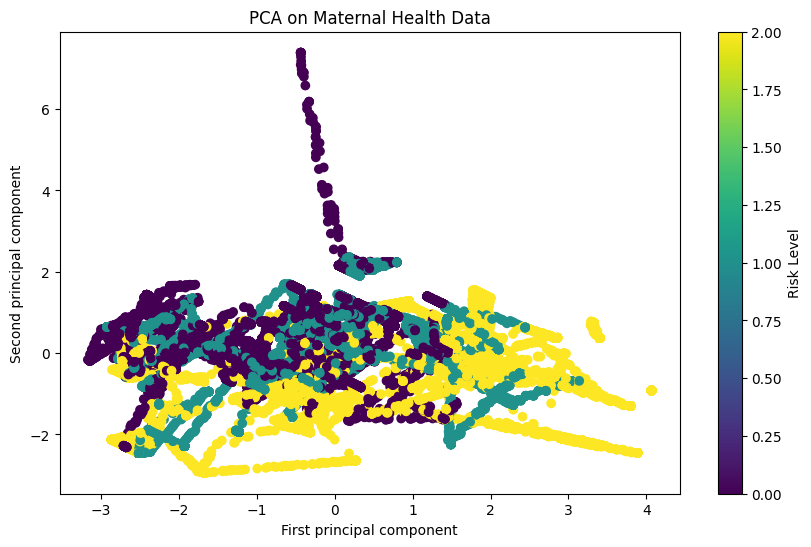

In [ ]:
# Applying PCA
#pca = PCA(n_components=2)
pca = PCA(0.95)
X_pca = pca.fit_transform(X_train_scaled)

# Convert string labels to numerical values for color mapping
label_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
y_train_numeric = y_train.map(label_mapping)

# Visualizing PCA results
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train_numeric, cmap='viridis') # Use numerical labels for color
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA on Maternal Health Data')
plt.colorbar(label='Risk Level') # Add a colorbar to show the mapping
plt.show()

              precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      4813
    low risk       0.97      0.93      0.95      7325
    mid risk       0.92      0.94      0.93      5862

    accuracy                           0.95     18000
   macro avg       0.95      0.95      0.95     18000
weighted avg       0.95      0.95      0.95     18000



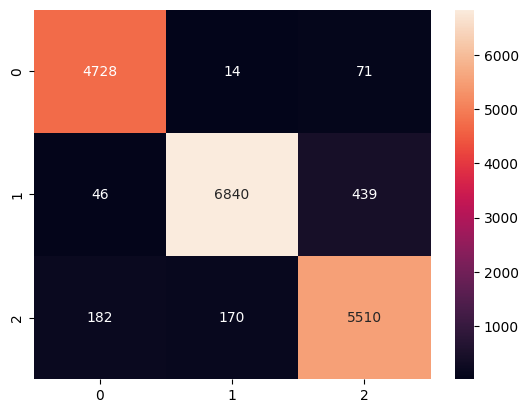

In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_pca, y_train)

# Apply PCA transformation to the test data
X_test_pca = pca.transform(X_test_scaled) # Transform test data using the same PCA

# Predictions
y_pred = clf.predict(X_test_pca) # Use the transformed test data for prediction

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

Classification Report:
              precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      4813
    low risk       0.97      0.93      0.95      7325
    mid risk       0.91      0.94      0.93      5862

    accuracy                           0.95     18000
   macro avg       0.95      0.95      0.95     18000
weighted avg       0.95      0.95      0.95     18000

Confusion Matrix:
[[4727   12   74]
 [  40 6848  437]
 [ 185  178 5499]]


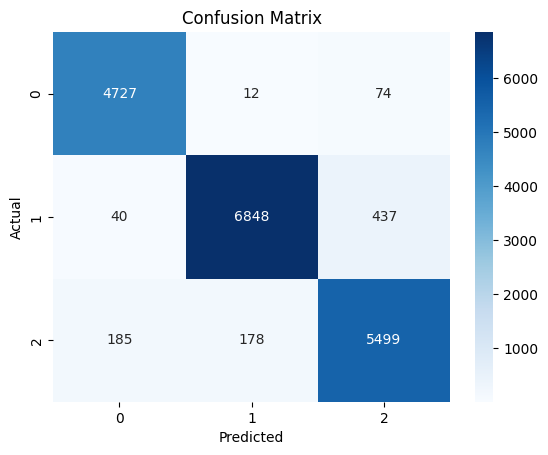

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

   high risk       0.93      0.94      0.93      4813
    low risk       0.87      0.91      0.89      7325
    mid risk       0.86      0.79      0.83      5862

    accuracy                           0.88     18000
   macro avg       0.89      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



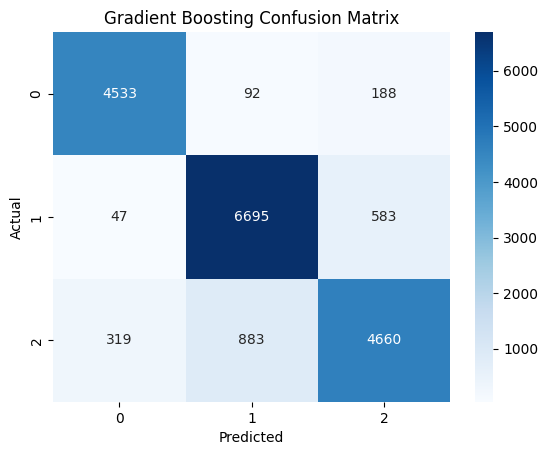

NameError: name 'y_test_binarize' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_clf.predict(X_test)

# Classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve and AUC for Gradient Boosting
y_pred_proba_gb = gb_clf.predict_proba(X_test)
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarize[:, i], y_pred_proba_gb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()


Voting Classifier Classification Report:
              precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      4813
    low risk       0.97      0.94      0.95      7325
    mid risk       0.92      0.93      0.93      5862

    accuracy                           0.95     18000
   macro avg       0.95      0.95      0.95     18000
weighted avg       0.95      0.95      0.95     18000



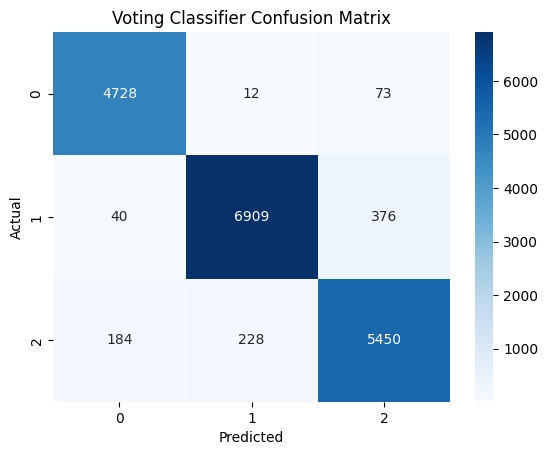

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.ensemble import VotingClassifier

from sklearn.preprocessing import label_binarize

# Initialize the models
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf), ('gb', gb_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_voting = voting_clf.predict(X_test)

# Classification report
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

# Confusion matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Binarize the test labels
y_test_binarize = label_binarize(y_test, classes=np.unique(y_test))

# ROC curve and AUC for Gradient Boosting
y_pred_proba_gb = gb_clf.predict_proba(X_test)
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarize[:, i], y_pred_proba_gb[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# SHAP values for feature importance
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values[1], X_test_scaled, feature_names=X.columns)

# Force plot (for the first instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.